# Beer Ratings and Reviews

In [2]:
import os
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data/train.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/data/train.csv')

## 1. Проанализировать данные, которые вам попались. Какие выводы можно сделать только из анализа? Проведите визуальный и статический анализ, опишите ваши находки

In [5]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

Пользователи предпочитают не указывать возраст, либо же это не сильное требование в анкете

In [7]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


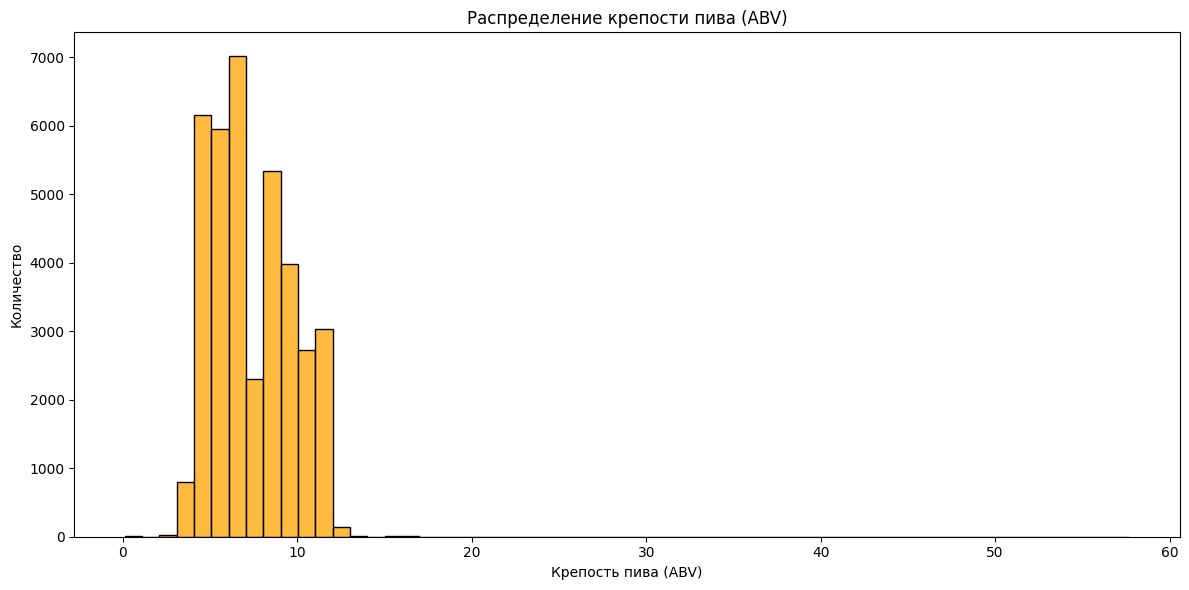

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df["beer/ABV"], binwidth=1, color="orange")
plt.xlabel("Крепость пива (ABV)")
plt.ylabel("Количество")
plt.title("Распределение крепости пива (ABV)")
plt.tight_layout()
plt.show()

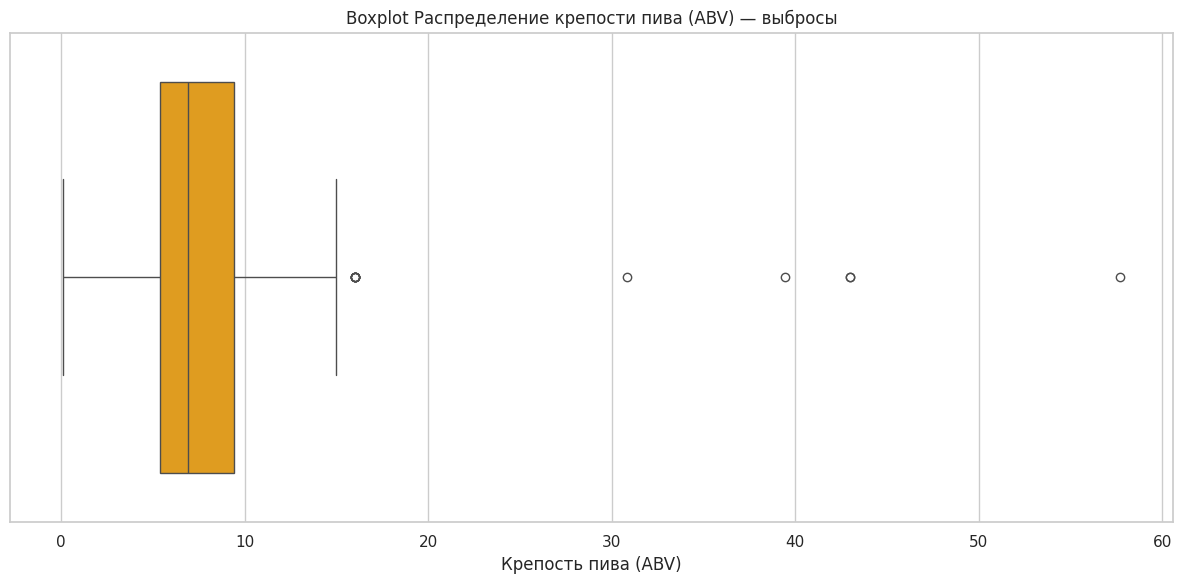

In [9]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(x=df["beer/ABV"], color="orange")
plt.xlabel("Крепость пива (ABV)")
plt.title("Boxplot Распределение крепости пива (ABV) — выбросы")
plt.tight_layout()
plt.show()

Большинство образцов пива имеют крепость (ABV) от 5% до 10%, а значения выше 15% являются редкими выбросами

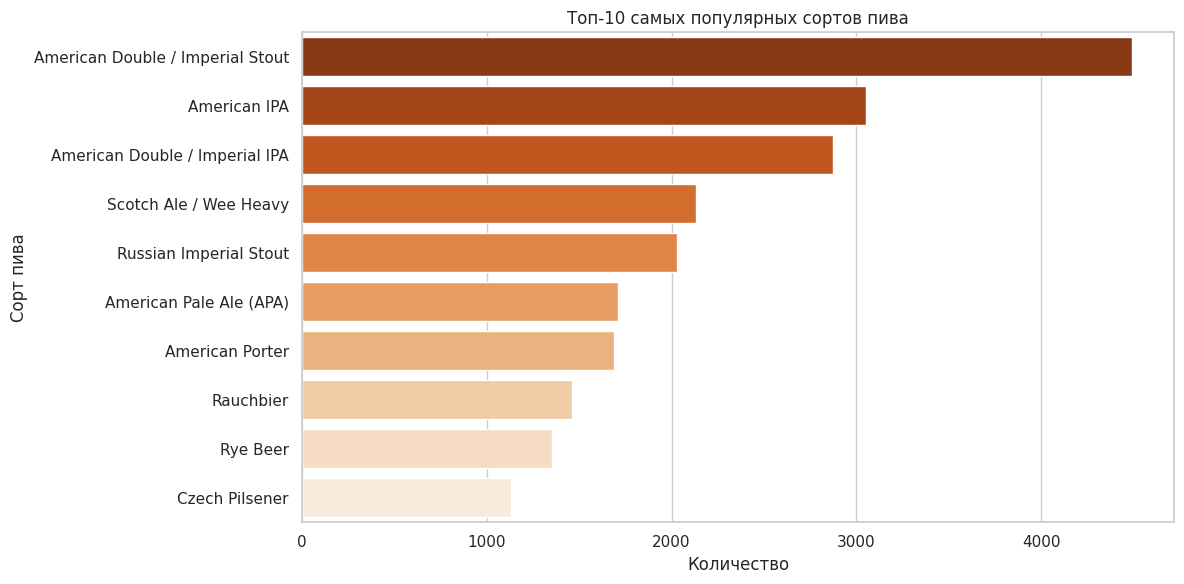

In [10]:
top_10_styles = df['beer/style'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_styles.values, y=top_10_styles.index, hue=top_10_styles.index, palette="Oranges_r", legend=False)
plt.xlabel("Количество")
plt.ylabel("Сорт пива")
plt.title("Топ-10 самых популярных сортов пива")
plt.tight_layout()
plt.show()

Американские сорта пива пользуются популярностью, больше чем другие

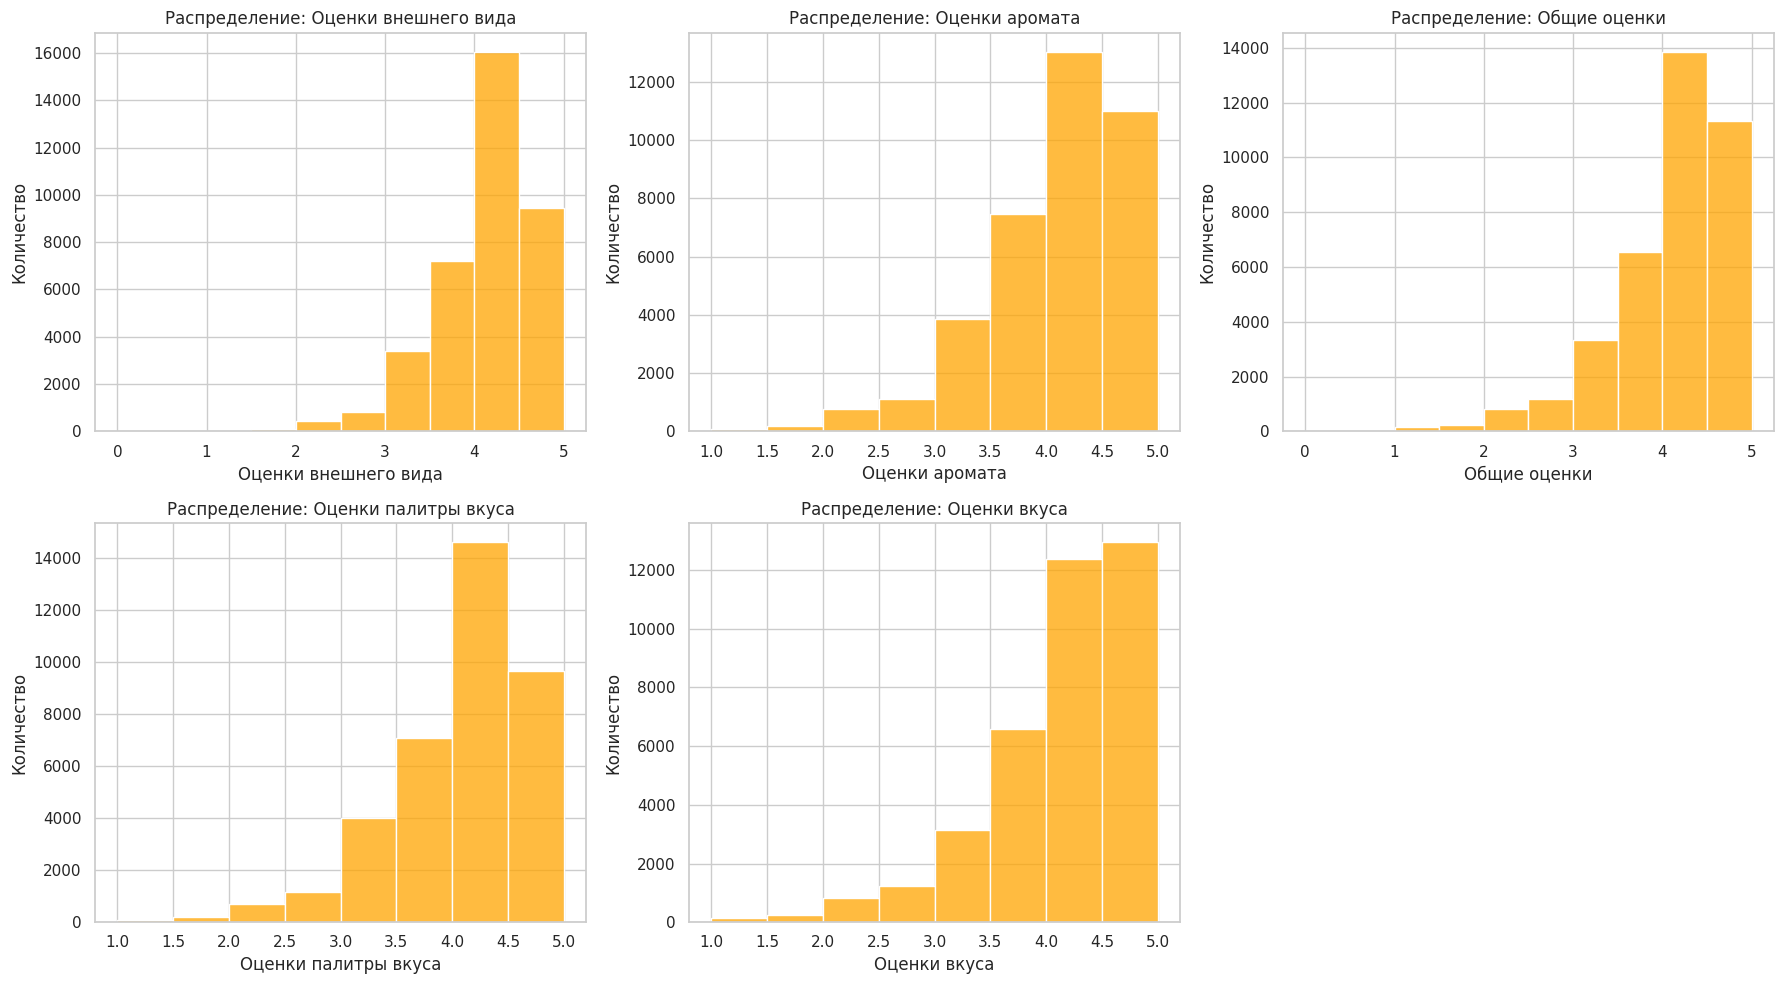

In [11]:
columns = [
    ("review/appearance", "Оценки внешнего вида"),
    ("review/aroma", "Оценки аромата"),
    ("review/overall", "Общие оценки"),
    ("review/palate", "Оценки палитры вкуса"),
    ("review/taste", "Оценки вкуса")
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (col, label) in enumerate(columns):
    sns.histplot(df[col], binwidth=0.5, color="orange", ax=axes[i])
    axes[i].set_title(f"Распределение: {label}")
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("Количество")

if len(columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Пользователи склонны оценивать пиво довольно щедро, с основным акцентом на вкус и общее впечатление

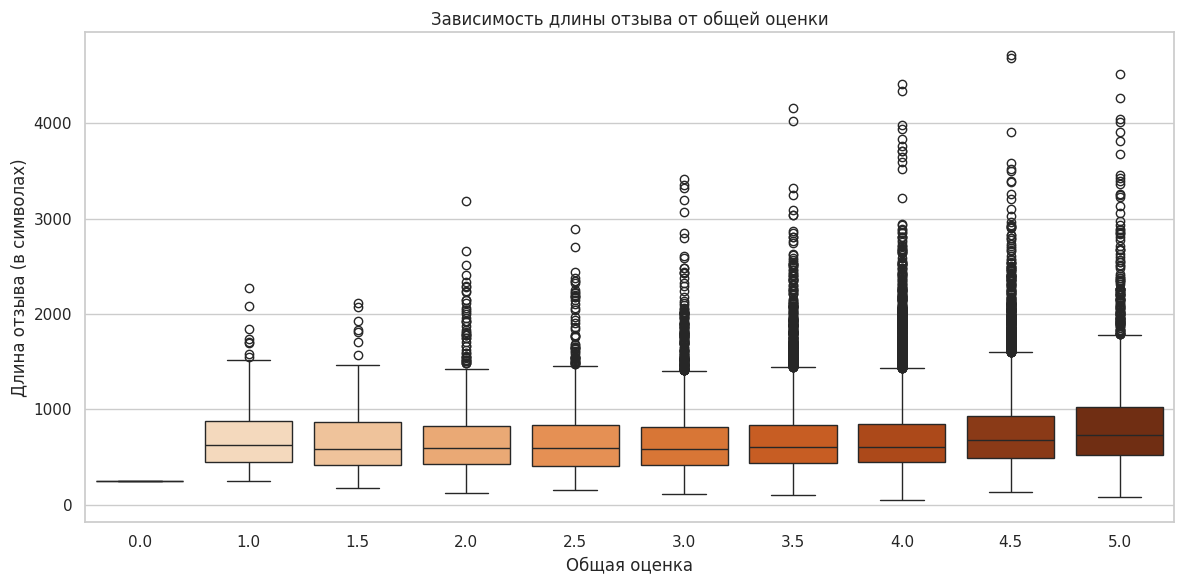

In [12]:
df["review_length"] = df["review/text"].str.len()

plt.figure(figsize=(12, 6))
sns.boxplot(x="review/overall", y="review_length", hue="review/overall", legend=False, data=df, palette="Oranges")
plt.xlabel("Общая оценка")
plt.ylabel("Длина отзыва (в символах)")
plt.title("Зависимость длины отзыва от общей оценки")
plt.tight_layout()
plt.show()

del df["review_length"]

Положительные отзывы состоят из большего количества символов

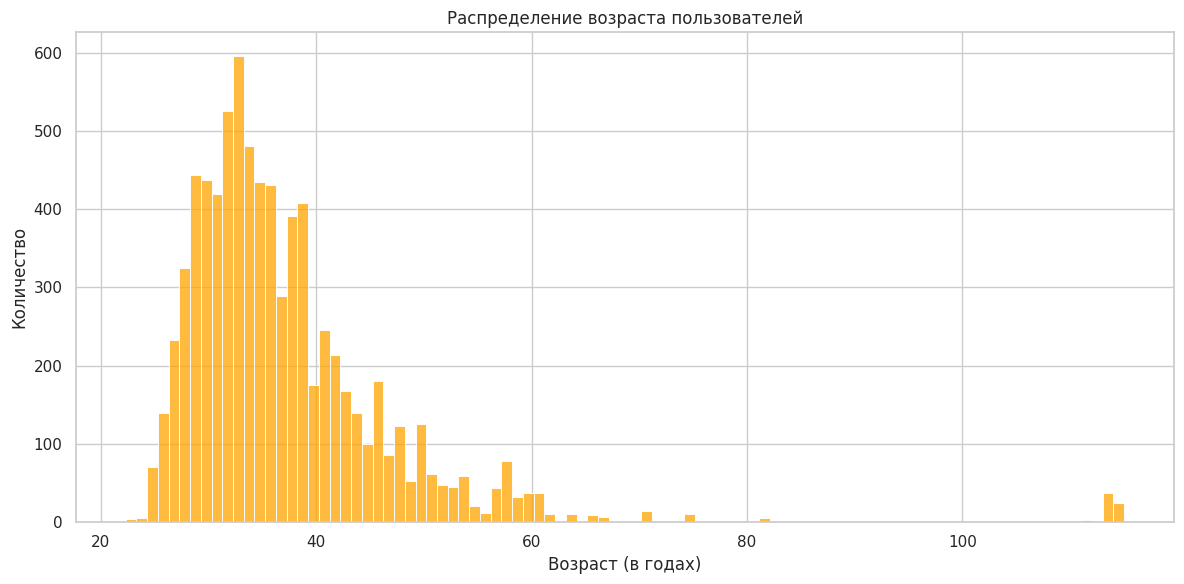

In [13]:
df["user/ageInYears"] = df["user/ageInSeconds"] / (365 * 24 * 60 * 60)

plt.figure(figsize=(12, 6))
sns.histplot(df["user/ageInYears"], binwidth=1, color="orange")
plt.xlabel("Возраст (в годах)")
plt.ylabel("Количество")
plt.title("Распределение возраста пользователей")
plt.tight_layout()
plt.show()

del df["user/ageInYears"]

В основном возраст пользователей в районе 30 лет. Есть пользователи, чей возраст больша 100 лет, что скорее всего значит, что их дата рождения откатилась в минимально возможной 01.01.1900

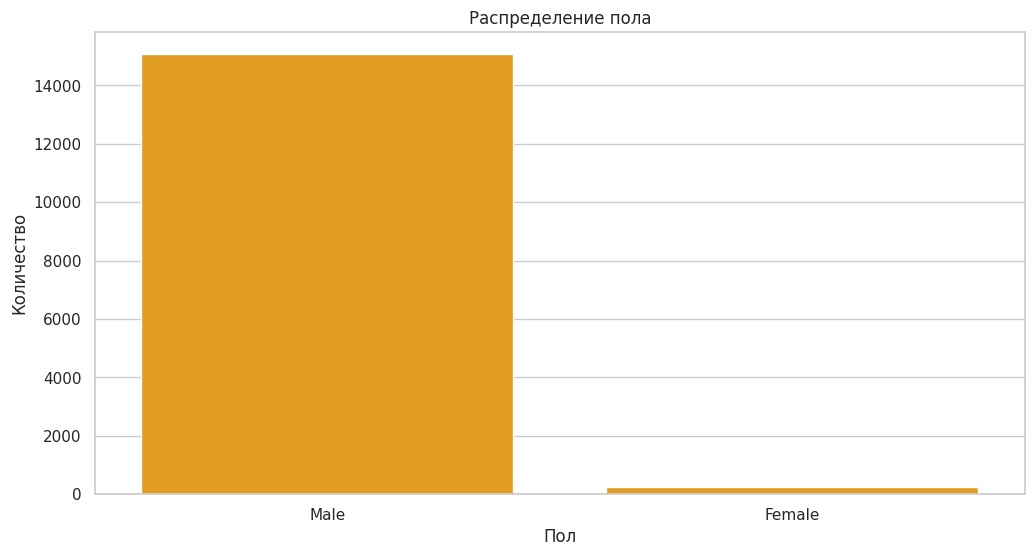

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["user/gender"], data=df, color="orange")
plt.title('Распределение пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

Основные оценки пива идут от пользователей мужчин

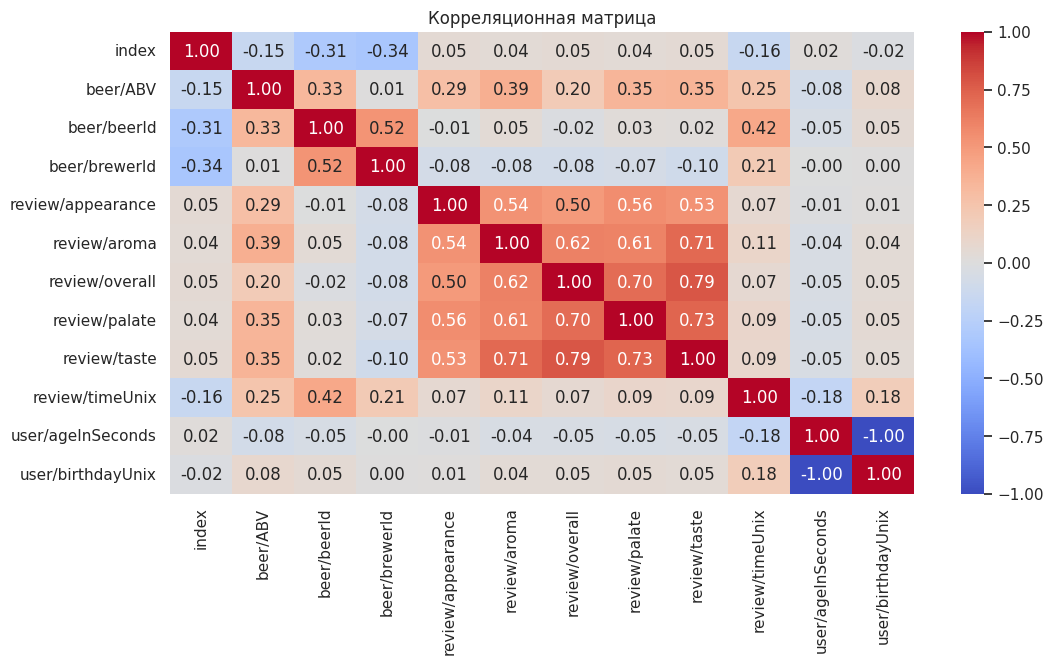

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

Самая высокая корреляция у review/overall с review/taste (0.79)

> Вкус — главный фактор, влияющий на общую оценку

Небольшая положительная корреляция между beer/ABV (алкоголь) и review/aroma, review/taste (~0.35–0.39)

> Возможно, крепкие сорта кажутся более ароматными и вкусными

Практически нет связи с возрастом пользователя и ID пива/пивоварни

> Возраст пользователя и конкретное пиво почти не влияют на оценки




## 2. Определите, какое моделирование доступно для ваших данных. Какие есть в них связи?

Классификационные модели можно использовать для предсказания стиля пива по его характеристикам: крепости, частным оценкам (вкус, аромат, палитра и др.), а также по тексту отзыва. Это может быть полезно для автоматического определения типа нового сорта, даже если его ещё не классифицировали вручную

Задачи регрессии актуальны для предсказания итоговой оценки (review/overall) на основе остальных параметров. Например, можно выяснить, насколько сильно на итоговый балл влияет вкус или аромат. Также регрессионные модели можно использовать для сравнения продукции разных пивоварен: на основе предсказанных оценок выявлять стабильность качества и уровень популярности

При этом между признаками в данных наблюдаются сильные взаимосвязи: частные оценки хорошо коррелируют с итоговой, а такие характеристики, как крепость, показывают слабую, но стабильную связь с восприятием вкуса и аромата. Это говорит о том, что задачи предсказания на этих данных будут хорошо решаемы

## 3. Опишите возможные верхнеуровневые задачи, которые можно решать с помощью таких данных

Можно создать рекомендательные системы, предсказывая пиво, которое понравится пользователю на основе его предыдущих оценок. Также возможно предсказать общую оценку пива на основе других характеристик, решая задачу регрессии. В области анализа текста можно извлекать тональность и ключевые темы из отзывов. Кластеризация пива по стилям и характеристикам, а также сегментация пользователей по их вкусам могут помочь в анализе и маркетинге

## 4. Очистите и обработайте данные. Опишите, какие в них были проблемы.



In [16]:
df.isnull().sum()

,0
index,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0


In [17]:
df.drop(columns=["index", "review/timeStruct", "user/birthdayRaw", "user/birthdayUnix", "user/profileName"], inplace=True)

Дропаем `index` - просто нумерация, `review/timeStruct` - словарь, который дублирует `review/timeUnix`, при чем сложный для анализа. `user/birthdayRaw` и `user/birthdayUnix`: они дублируют `user/ageInSeconds`, `user/profileName` - также не важен для анализа




In [18]:
df["user/ageInYears"] = df["user/ageInSeconds"] // (60 * 60 * 24 * 365)

valid_ages = df[(df["user/ageInYears"] >= 18) & (df["user/ageInYears"] <= 100)]
median_age = valid_ages["user/ageInYears"].median()

df.fillna({"user/ageInYears": median_age}, inplace=True)

df.drop(columns="user/ageInSeconds", inplace=True)

`user/ageInSeconds` можно перевести в возраст в годах для удобства, также заполним пропуски медианой и удалим аномальные возраста

In [19]:
df.fillna({"review/text": ""}, inplace=True)
df.fillna({"user/gender": "Unknown"}, inplace=True)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.isnull().sum()

,0
beer/ABV,0
beer/beerId,0
beer/brewerId,0
beer/name,0
beer/style,0
review/appearance,0
review/aroma,0
review/overall,0
review/palate,0
review/taste,0


In [22]:
df = df[df["beer/ABV"] <= 20]

Значения ABV выше 20% являются крайне редкими или ошибочными, составляют лишь 0.016% датасета и могут искажать анализ

In [23]:
df["review/time"] = pd.to_datetime(df["review/timeUnix"], unit="s")
df["review/year"] = df["review/time"].dt.year
df["review/month"] = df["review/time"].dt.month
df["review/dayofweek"] = df["review/time"].dt.dayofweek
df.drop(columns="review/timeUnix", inplace=True)
df.drop(columns="review/time", inplace=True)

Признаки дают контекст времени: сезонность, популярность стиля в году, изменения вкусов

In [24]:
df = pd.get_dummies(df, columns=["user/gender"], prefix="user/gender", dtype=int)

Превращаем в числовые признаки для работы

In [25]:
df["beer/style"].nunique()


94

In [26]:
df["beer/style"].value_counts()


,count
beer/style,
American Double / Imperial Stout,4495
American IPA,3050
American Double / Imperial IPA,2872
Scotch Ale / Wee Heavy,2133
Russian Imperial Stout,2032
...,...
Lambic - Fruit,6
Berliner Weissbier,6
Kristalweizen,6


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["beer/style_encoded"] = le.fit_transform(df["beer/style"])

In [28]:
df.drop(columns="beer/name", inplace=True)
df.drop(columns="beer/style", inplace=True)

Делаем Label Encoding для преобразования в числовые признаки вместо one hot, тк 94 вида пива, что много для one hot

In [29]:
df["review/text_length"] = df["review/text"].apply(len)

In [30]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df["review/sentiment"] = df["review/text"].apply(lambda x: analyzer.polarity_scores(x)["compound"])


In [32]:
df.drop(columns="review/text", inplace=True)

Для упрощения модели и сохранения важных признаков используем только длину текста и анализ тональности отзыва(настроения) от -1 до 1, где -1 очень негативно, а +1 это очень позитивно

In [33]:
df

,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,user/ageInYears,review/year,review/month,review/dayofweek,user/gender_Female,user/gender_Male,user/gender_Unknown,beer/style_encoded,review/text_length,review/sentiment
0,5.00,46634,14338,4.0,4.0,4.0,4.0,4.0,34.0,2008,12,1,0,0,1,60,519,0.0258
1,11.00,3003,395,4.0,3.5,3.5,3.5,3.0,34.0,2008,8,4,0,0,1,4,568,0.9434
2,4.70,961,365,3.5,4.0,3.5,3.5,3.5,34.0,2004,11,4,0,1,0,14,392,0.8175
3,4.40,429,1,3.0,3.0,2.5,3.0,3.0,38.0,2011,6,0,0,1,0,35,391,0.8625
4,4.40,4904,1417,4.0,3.0,3.0,3.5,2.5,34.0,2011,3,5,0,0,1,45,486,0.9305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,5.50,22450,3268,4.0,3.5,3.5,3.5,3.5,34.0,2008,4,3,0,0,1,57,616,0.9010
37496,8.50,7463,1199,4.5,4.0,3.5,4.5,4.5,34.0,2010,1,6,0,0,1,84,894,0.9944
37497,4.75,1154,394,4.0,3.5,4.0,4.5,4.0,34.0,2003,10,5,0,0,1,74,539,0.9410
37498,11.20,19960,1199,4.0,4.0,4.0,5.0,5.0,34.0,2011,1,5,0,0,1,11,683,0.9415


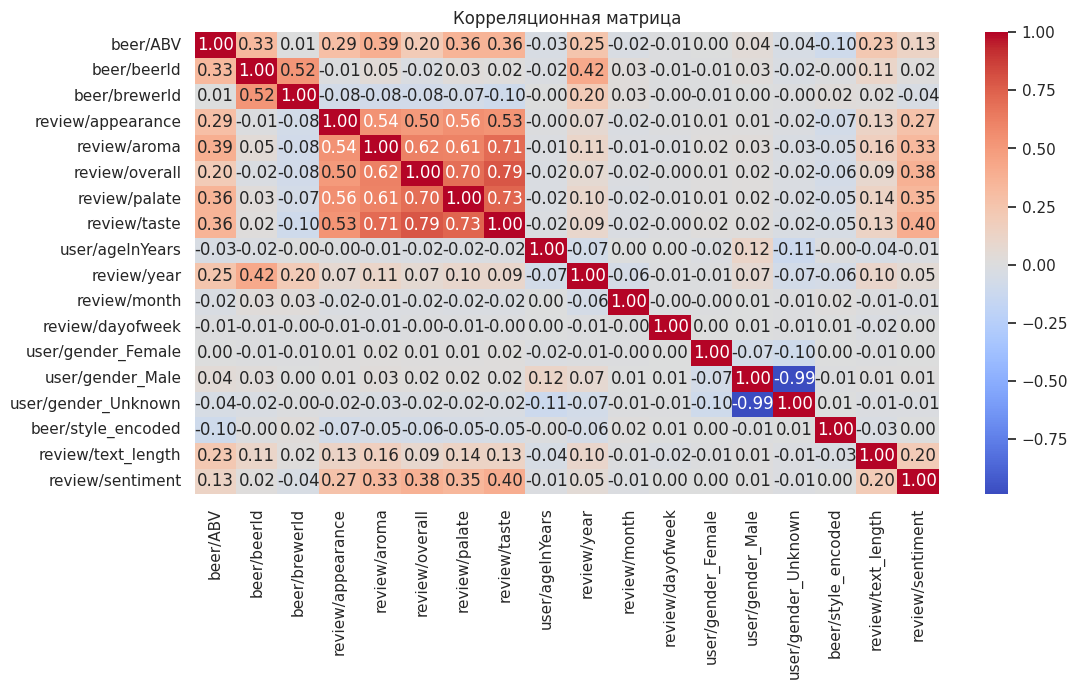

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

## 5. Постройте подходящую предсказательную модель. Обоснуйте ее выбор.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
target = "review/overall"

y = df[target]
X = df.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
param_grids = {
    "Ridge": {
        "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.1, 0.2]
    }
}

base_models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

best_results = {}

In [40]:
# GridSearch для моделей с параметрами
for name, model in base_models.items():
    print(f"Поиск параметров для {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    best_results[name] = {
        "model": best_model,
        "y_pred": y_pred,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "best_params": grid.best_params_
    }

Поиск параметров для Ridge...
Поиск параметров для Random Forest...
Поиск параметров для XGBoost...


In [41]:
# Добавим линейную регрессию (без подбора)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [42]:
best_results["Linear Regression"] = {
    "model": lr_model,
    "y_pred": y_pred_lr,
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "MSE": mean_squared_error(y_test, y_pred_lr),
    "R2": r2_score(y_test, y_pred_lr),
    "best_params": {}
}

In [43]:
best_metrics_df = pd.DataFrame({
    name: {
        "MAE": res["MAE"],
        "MSE": res["MSE"],
        "R2": res["R2"]
    } for name, res in best_results.items()
}).T.sort_values("MSE")

In [44]:
display(best_metrics_df)

,MAE,MSE,R2
XGBoost,0.298230,0.153792,0.685679
Random Forest,0.302875,0.158758,0.675530
Ridge,0.304493,0.161355,0.670223
Linear Regression,0.304491,0.161359,0.670214


In [46]:
best_model_name = best_metrics_df.index[0]
best_model_name

'XGBoost'

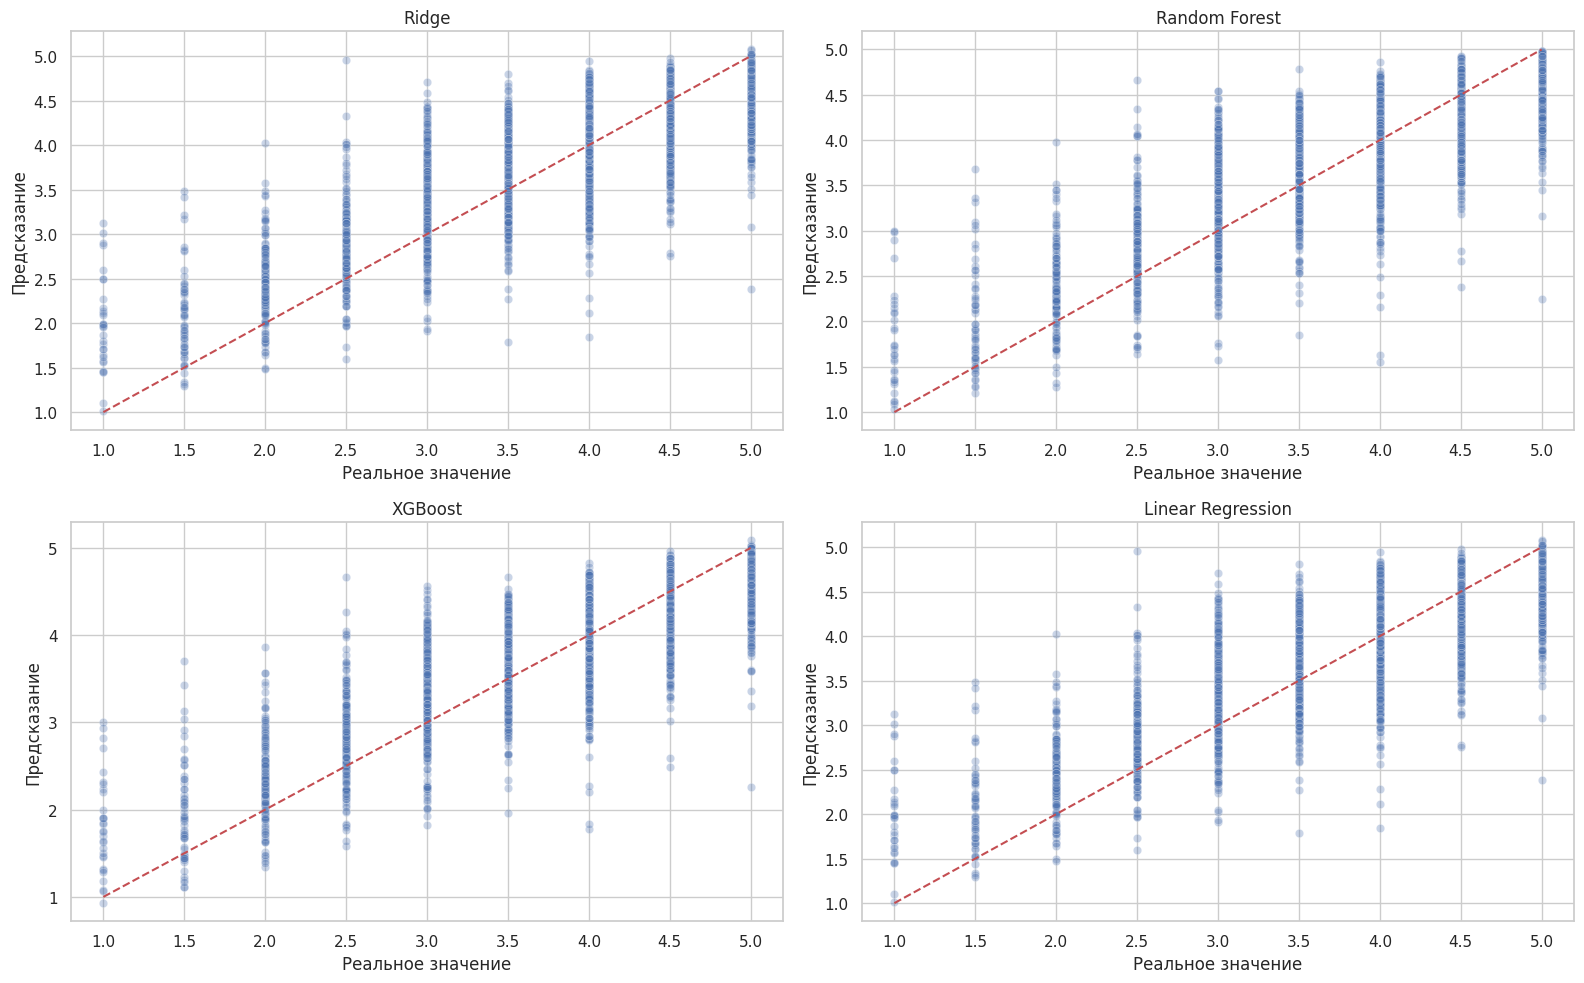

In [47]:
plt.figure(figsize=(16, 10))
for i, (name, res) in enumerate(best_results.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=res["y_pred"], alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Реальное значение")
    plt.ylabel("Предсказание")
    plt.title(name)
plt.tight_layout()
plt.show()

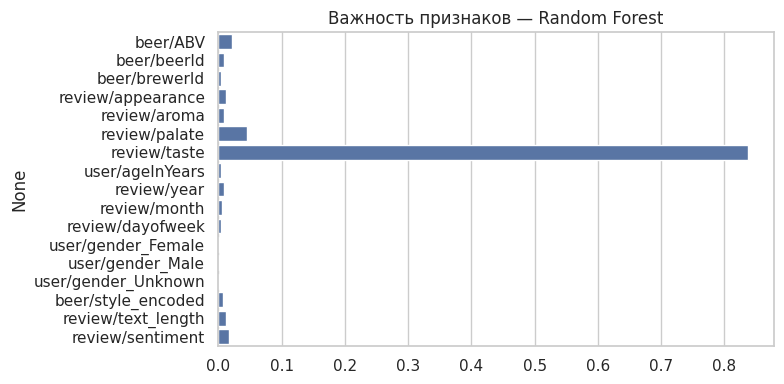

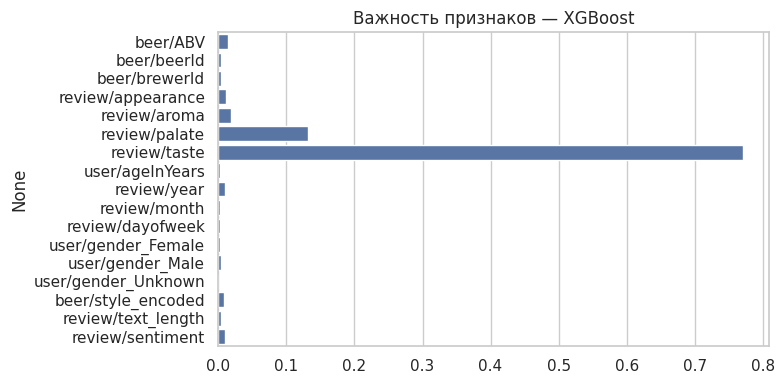

In [48]:
for name in ["Random Forest", "XGBoost"]:
    model = best_results[name]["model"]
    importances = model.feature_importances_
    plt.figure(figsize=(8, 4))
    sns.barplot(x=importances, y=X.columns)
    plt.title(f"Важность признаков — {name}")
    plt.tight_layout()
    plt.show()

**XGBoost** - лучшая модель

После подбора гиперпараметров и сравнения всех моделей по ключевым метрикам качества, **наилучшие результаты** показала модель **XGBoost**, продемонстрировав:

| Модель             | MAE     | MSE     | R²      |
|--------------------|---------|---------|---------|
| **XGBoost**        | **0.2982** | **0.1538** | **0.6857** |
| Random Forest      | 0.3029  | 0.1588  | 0.6755  |
| Ridge              | 0.3045  | 0.1614  | 0.6702  |
| Linear Regression  | 0.3045  | 0.1614  | 0.6702  |

- **Более гибкая структура**: XGBoost — градиентный бустинг над деревьями решений. Он строит деревья последовательно, улучшая ошибки предыдущих. Это позволяет лучше уловить сложные зависимости в данных (например, сочетание стиля и крепости пива)

- **Снижение переобучения**: В XGBoost встроены механизмы регуляризации, что делает его менее чувствительным к переобучению по сравнению с Random Forest

- **Обработка разреженных и категориальных признаков**: Несмотря на то, что данные были числовыми, бустинг эффективен даже при частичном шуме и менее выраженных признаках, как, например, `sentiment` и `review_length`

- **Лучшее объяснение дисперсии** (`R² = 0.6857`) — XGBoost объясняет почти 69% вариации в оценке, что значительно выше базовой линейной модели (67%).

1. Предсказание vs Реальное значение

- **XGBoost** и **Random Forest** демонстрируют наилучшее приближение предсказаний к диагонал
- **Ridge** и **Linear Regression** показывают большее рассеяние, особенно в крайних оценках (1.0 и 5.0), что указывает на **меньшую гибкость** линейных подходов
- Общее поведение всех моделей показывает тенденцию к **сглаживанию крайних значений**, особенно в области низких и высоких оценок

2. Важность признаков

- В обеих деревоподобных моделях (**XGBoost**, **Random Forest**) наибольшую важность имеет признак **`beer/style`**, что соответствует ожиданиям — стиль пива влияет на восприятие и предпочтения
- Также заметен вклад таких признаков, как **длина отзыва (`review_length`)** и **настроение (`sentiment`)** — они отражают мнение потребителя и его эмоциональную оценку, что усиливает сигнал модели

## 6. Выберите и обоснуйте метрики для ее оценки. Покажите, как модель работает на данных, которые не видела при обучении.

Для оценки моделей я использовал три метрики:

- **MAE (Mean Absolute Error)** — интерпретируемая метрика, показывающая среднюю абсолютную ошибку предсказания. Полезна для оценки "обычных" отклонений, не чувствительна к выбросам
- **MSE (Mean Squared Error)** — усиливает штраф за большие ошибки (из-за возведения в квадрат). Хорошо показывает стабильность модели и полезен в задачах, где большие ошибки критичны
- **R² (коэффициент детерминации)** — показывает, какую долю дисперсии объясняет модель. Важен для общей интерпретации качества модели

> Отказался от RMSE в пользу **MSE**, так как MSE используется в качестве функции потерь при обучении моделей и лучше отражает приоритет точности в случае аномально высоких оценок

## 7. Представьте, что решаете реальную бизнес-задачу. Как вы могли бы использовать вашу модель? Какие бизнес-метрики могли бы быть использованы для ее контроля?

Обсуждение бизнес-контекста использования модели:

В реальной бизнес-ситуации, например, для пивоваренной компании или торговой площадки, такая модель могла бы:

1. Прогнозировать успех нового сорта пива:
   Предсказанная итоговая оценка даст предварительное представление о том, как рынок воспримет продукт

2. Служить основой для рекомендательных систем:
   В сочетании с отзывами пользователей, модель позволяет сегментировать пользователей и предлагать
   им сорта пива с наибольшей вероятностью высокого качества и удовлетворенности

3. Контролировать качество продукции:
   Сравнивая фактические оценки с предсказанными, компания может оперативно реагировать на проблемы
   в рецептуре или производственном процессе

Для контроля эффективности модели можно использовать:
- Метрики прогнозирования (MAE, MSE, R²) для оценки качества предсказаний
- Бизнес-метрики, такие как рост продаж, конверсия пользователей, уровень удовлетворенности (средний рейтинг)
  и повторные покупки, чтобы понять влияние модели на реальные показатели компании
